In [1]:
import os
import pickle
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [2]:
# Define footprint pattern class names
class_names = [
    "Flat Foot", "High Arch", "Normal Arch", "Overpronation", "Supination",
    "Toe Walker", "Heel Walker", "Asymmetrical Footprint", "Irregular Pressure Distribution"
]

In [3]:

# Load dataset
DATASET_PATH = "C:\\Users\\shant\\.cache\\kagglehub\\datasets\\mahdiislam\\pressure-sensor-heatmaprgb\\versions\\1\\"
X_path = os.path.join(DATASET_PATH, "X_9_RGB.pickle")
y_path = os.path.join(DATASET_PATH, "y_9_RGB.pickle")


In [4]:

with open(X_path, 'rb') as f:
    X_data = pickle.load(f)

with open(y_path, 'rb') as f:
    y_data = pickle.load(f)


In [5]:

# Normalize image data
X_data = X_data / 255.0  # Scale pixel values to [0,1]


In [6]:

# Convert labels to categorical
num_classes = len(class_names)
y_data = tf.keras.utils.to_categorical(y_data, num_classes)


In [7]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [8]:

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

c:\DRIVE\Projects\4.3.25\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 783ms/step - accuracy: 0.4194 - loss: 1.5518 - val_accuracy: 0.8781 - val_loss: 0.3875
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 694ms/step - accuracy: 0.9234 - loss: 0.2390 - val_accuracy: 0.9363 - val_loss: 0.1863
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 689ms/step - accuracy: 0.9654 - loss: 0.0808 - val_accuracy: 0.9861 - val_loss: 0.0661
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 657ms/step - accuracy: 0.9814 - loss: 0.0547 - val_accuracy: 0.9806 - val_loss: 0.0984
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 707ms/step - accuracy: 0.9818 - loss: 0.0575 - val_accuracy: 0.9751 - val_loss: 0.0640
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 732ms/step - accuracy: 0.9865 - loss: 0.0457 - val_accuracy: 0.9834 - val_loss: 0.0694
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 718ms/step - accuracy: 0.9918 - loss: 0.0396 - val_accuracy: 0.9668 - val_loss: 0.1457
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 691ms/step - accuracy: 0.9872 - loss: 0.0379 - val_accu

In [11]:

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


12/12 - 2s - 156ms/step - accuracy: 0.9751 - loss: 0.1201
Test Accuracy: 97.51%


In [12]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have these variables defined earlier
# num_classes = 9  # Or the number of classes in your dataset
# X_test = ... # Your test dataset
# y_test = ... # Your test labels (one-hot encoded)
# class_names = ... # List of class names for each class label

# Save random samples from test data
save_dir = "sampleinput"
os.makedirs(save_dir, exist_ok=True)

# Dictionary to store random samples by class label
random_samples = {}

# Step 1: Randomly choose a sample from each class
for class_label in range(num_classes):
    class_indices = np.where(np.argmax(y_test, axis=1) == class_label)[0]
    if len(class_indices) > 0:
        random_sample_index = random.choice(class_indices)
        random_samples[class_label] = random_sample_index

# Step 2: Save the randomly selected images as JPEG files
for i, (class_label, idx) in enumerate(random_samples.items()):
    image = X_test[idx]  # Get the image from the test data
    label_name = class_names[class_label]  # Get the class name for the label
    
    # Define the file path with a .jpg extension
    image_path = os.path.join(save_dir, f"sample_{i+1}_label_{label_name}.jpg")
    
    # Display and save the image as JPEG
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(image_path, format='jpg')  # Save as JPEG format
    plt.close()  # Close the plot to free memory

    # Print confirmation
    print(f"Sample {i+1} saved to: {image_path} with label: {label_name}")

print("Random samples saved successfully!")


Sample 1 saved to: sampleinput\sample_1_label_Flat Foot.jpg with label: Flat Foot
Sample 2 saved to: sampleinput\sample_2_label_High Arch.jpg with label: High Arch
Sample 3 saved to: sampleinput\sample_3_label_Normal Arch.jpg with label: Normal Arch
Sample 4 saved to: sampleinput\sample_4_label_Overpronation.jpg with label: Overpronation
Sample 5 saved to: sampleinput\sample_5_label_Supination.jpg with label: Supination
Sample 6 saved to: sampleinput\sample_6_label_Toe Walker.jpg with label: Toe Walker
Sample 7 saved to: sampleinput\sample_7_label_Heel Walker.jpg with label: Heel Walker
Sample 8 saved to: sampleinput\sample_8_label_Asymmetrical Footprint.jpg with label: Asymmetrical Footprint
Sample 9 saved to: sampleinput\sample_9_label_Irregular Pressure Distribution.jpg with label: Irregular Pressure Distribution
Random samples saved successfully!


In [13]:
model.save('cnn_model.h5')  # Save the model

Done

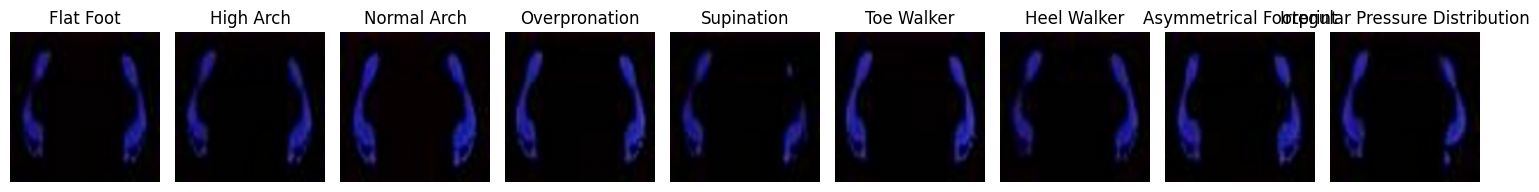

In [14]:

# Visualize sample images with class names
fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))
for i in range(num_classes):
    class_indices = np.where(np.argmax(y_data, axis=1) == i)[0]
    if len(class_indices) > 0:
        axes[i].imshow(X_data[class_indices[0]])
        axes[i].set_title(class_names[i])
        axes[i].axis('off')
plt.tight_layout()
plt.show()


Corrected


In [20]:
import os
import pickle
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight


In [21]:

# Define footprint pattern class names
class_names = [
    "Flat Foot", "High Arch", "Normal Arch", "Overpronation", "Supination",
    "Toe Walker", "Heel Walker", "Asymmetrical Footprint", "Irregular Pressure Distribution"
]

# Load dataset
DATASET_PATH = "C:\\Users\\shant\\.cache\\kagglehub\\datasets\\mahdiislam\\pressure-sensor-heatmaprgb\\versions\\1\\"
X_path = os.path.join(DATASET_PATH, "X_9_RGB.pickle")
y_path = os.path.join(DATASET_PATH, "y_9_RGB.pickle")

with open(X_path, 'rb') as f:
    X_data = pickle.load(f)

with open(y_path, 'rb') as f:
    y_data = pickle.load(f)

# Normalize image data
X_data = X_data.astype('float32') / 255.0  # Ensure consistency

# Convert labels to categorical
num_classes = len(class_names)
y_data = tf.keras.utils.to_categorical(y_data, num_classes)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.arange(num_classes), y=np.argmax(y_data, axis=1))
class_weights_dict = {i: class_weights[i] for i in range(num_classes)}



In [ ]:
# # Build CNN Model
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),  # Reduce feature map size
#     layers.Flatten(),  # Flattens to shape (N,)
    
#     # Debugging: Print Flattened output shape before Dense layer
#     layers.Lambda(lambda x: tf.print("Flattened shape:", tf.shape(x))),
    
#     layers.Dense(256, activation='relu'),  # Adjusted Dense layer size
#     layers.Dense(len(class_names), activation='softmax')
# ])


In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Reduce feature map size
    layers.Flatten(),  # Flattens to shape (N,)
    
    # Debugging: Print Flattened output shape before Dense layer
    layers.Lambda(lambda x: tf.print("Flattened shape:", tf.shape(x))),
    
    layers.Dense(256, activation='relu'),  # Adjusted Dense layer size
    layers.Dense(len(class_names), activation='softmax')
])


c:\DRIVE\Projects\4.3.25\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [24]:

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mOnly input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: name: "sequential_1_1/lambda_1_1/PrintV2"
op: "PrintV2"
input: "sequential_1_1/lambda_1_1/StringFormat"
attr {
  key: "output_stream"
  value {
    s: "stderr"
  }
}
attr {
  key: "end"
  value {
    s: "\r\n"
  }
}
 (of type <class 'tensorflow.python.framework.ops.Operation'>)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None

In [64]:

# Train Model with Class Weights
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)


Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mOnly input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: name: "sequential_13_1/lambda_9_1/PrintV2"
op: "PrintV2"
input: "sequential_13_1/lambda_9_1/StringFormat"
attr {
  key: "output_stream"
  value {
    s: "stderr"
  }
}
attr {
  key: "end"
  value {
    s: "\r\n"
  }
}
 (of type <class 'tensorflow.python.framework.ops.Operation'>)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None

In [25]:
# Train Model with Class Weights
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)



Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mOnly input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: name: "sequential_1_1/lambda_1_1/PrintV2"
op: "PrintV2"
input: "sequential_1_1/lambda_1_1/StringFormat"
attr {
  key: "output_stream"
  value {
    s: "stderr"
  }
}
attr {
  key: "end"
  value {
    s: "\r\n"
  }
}
 (of type <class 'tensorflow.python.framework.ops.Operation'>)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None

In [21]:

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


12/12 - 3s - 232ms/step - accuracy: 0.0970 - loss: 2.2001
Test Accuracy: 9.70%


In [22]:

# Save the model
model.save('footprint_model.h5')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


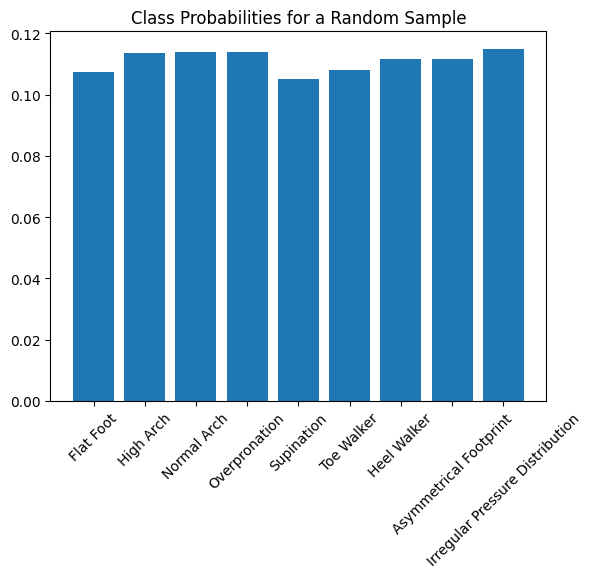

In [23]:
# Debugging: Visualizing Prediction Probabilities
sample_idx = random.randint(0, len(X_test) - 1)
pred_probs = model.predict(np.expand_dims(X_test[sample_idx], axis=0))
plt.bar(class_names, pred_probs[0])
plt.xticks(rotation=45)
plt.title("Class Probabilities for a Random Sample")
plt.show()



In [24]:
# Save Random Samples
save_dir = "sampleinput"
os.makedirs(save_dir, exist_ok=True)
random_samples = {}
for class_label in range(num_classes):
    class_indices = np.where(np.argmax(y_test, axis=1) == class_label)[0]
    if len(class_indices) > 0:
        random_sample_index = random.choice(class_indices)
        random_samples[class_label] = random_sample_index

for i, (class_label, idx) in enumerate(random_samples.items()):
    image = X_test[idx]
    label_name = class_names[class_label]
    image_path = os.path.join(save_dir, f"sample_{i+1}_label_{label_name}.png")
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(image_path)
    plt.close()
    print(f"Sample {i+1} saved to: {image_path} with label: {label_name}")


Sample 1 saved to: sampleinput\sample_1_label_Flat Foot.png with label: Flat Foot
Sample 2 saved to: sampleinput\sample_2_label_High Arch.png with label: High Arch
Sample 3 saved to: sampleinput\sample_3_label_Normal Arch.png with label: Normal Arch
Sample 4 saved to: sampleinput\sample_4_label_Overpronation.png with label: Overpronation
Sample 5 saved to: sampleinput\sample_5_label_Supination.png with label: Supination
Sample 6 saved to: sampleinput\sample_6_label_Toe Walker.png with label: Toe Walker
Sample 7 saved to: sampleinput\sample_7_label_Heel Walker.png with label: Heel Walker
Sample 8 saved to: sampleinput\sample_8_label_Asymmetrical Footprint.png with label: Asymmetrical Footprint
Sample 9 saved to: sampleinput\sample_9_label_Irregular Pressure Distribution.png with label: Irregular Pressure Distribution


correct 2


In [1]:
import os
import pickle
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight


In [2]:
# Define footprint pattern class names
class_names = [
    "Flat Foot", "High Arch", "Normal Arch", "Overpronation", "Supination",
    "Toe Walker", "Heel Walker", "Asymmetrical Footprint", "Irregular Pressure Distribution"
]


In [3]:
# Load dataset
DATASET_PATH = "C:\\Users\\shant\\.cache\\kagglehub\\datasets\\mahdiislam\\pressure-sensor-heatmaprgb\\versions\\1\\"
X_path = os.path.join(DATASET_PATH, "X_9_RGB.pickle")
y_path = os.path.join(DATASET_PATH, "y_9_RGB.pickle")

with open(X_path, 'rb') as f:
    X_data = pickle.load(f)

with open(y_path, 'rb') as f:
    y_data = pickle.load(f)

# Resize images to match the model input size (128,128)
X_data = np.array([tf.image.resize(img, (128, 128)).numpy() for img in X_data])


In [4]:
# Normalize image data
X_data = X_data.astype('float32') / 255.0

# Convert labels to categorical
num_classes = len(class_names)
y_data = tf.keras.utils.to_categorical(y_data, num_classes)

# Convert labels to integer for class weighting
y_data_int = np.argmax(y_data, axis=1)


In [5]:
# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_data_int),
    y=y_data_int
)
class_weights_dict = {i: class_weights[i] for i in range(num_classes)}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [6]:
# Debug: Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1440, 128, 128, 3)
y_train shape: (1440, 9)
X_test shape: (361, 128, 128, 3)
y_test shape: (361, 9)


In [7]:
# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Reduce feature map size
    layers.Flatten(),  # Flattens to shape (N,)

    # Debugging: Print Flattened output shape before Dense layer
    layers.Lambda(lambda x: tf.print("Flattened shape:", tf.shape(x))),

    layers.Dense(256, activation='relu'),  # Adjusted Dense layer size
    layers.Dense(len(class_names), activation='softmax')
])


c:\DRIVE\Projects\4.3.25\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
y_train_int = np.argmax(y_train, axis=1)  # Convert one-hot to integers
y_test_int = np.argmax(y_test, axis=1)


In [10]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),
    y=y_train_int
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_names))}


In [11]:
X_train = np.array([tf.image.resize(img, (128, 128)).numpy() for img in X_train])
X_test = np.array([tf.image.resize(img, (128, 128)).numpy() for img in X_test])


In [12]:
class_weights_dict = {int(i): class_weights[i] for i in range(len(class_names))}


In [13]:
# Debugging: Check dataset shapes
print("X_train shape:", X_train.shape)  # Should be (batch_size, 128, 128, 3)
print("y_train shape:", y_train.shape)  # Should be (batch_size, num_classes)


X_train shape: (1440, 128, 128, 3)
y_train shape: (1440, 9)


In [16]:

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mOnly input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: name: "sequential_1/lambda_1/PrintV2"
op: "PrintV2"
input: "sequential_1/lambda_1/StringFormat"
attr {
  key: "output_stream"
  value {
    s: "stderr"
  }
}
attr {
  key: "end"
  value {
    s: "\r\n"
  }
}
 (of type <class 'tensorflow.python.framework.ops.Operation'>)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 128, 128, 3), dtype=float32)
  • training=True
  • mask=None

correct 3

Epoch 1/30


c:\DRIVE\Projects\4.3.25\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.2525 - loss: 2.1442 - val_accuracy: 0.5983 - val_loss: 1.7214
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - accuracy: 0.5101 - loss: 1.4809 - val_accuracy: 0.6953 - val_loss: 0.9389
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.6650 - loss: 0.9705 - val_accuracy: 0.7368 - val_loss: 0.7824
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.7089 - loss: 0.7983 - val_accuracy: 0.7922 - val_loss: 0.5820
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.7493 - loss: 0.7072 - val_accuracy: 0.8310 - val_loss: 0.4805
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.7861 - loss: 0.5869 - val_accuracy: 0.8615 - val_loss: 0.4213
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.8281 - loss: 0.4872 - val_accuracy: 0.8310 - val_loss: 0.4104
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.8366 - loss: 0.4731 - val_accuracy: 0.8892 - val

Test Accuracy: 98.34%


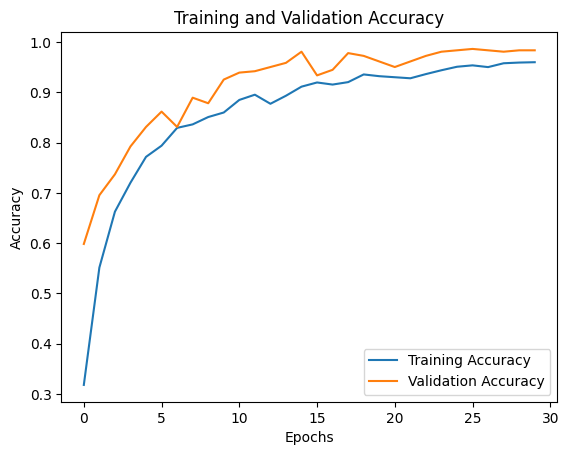

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


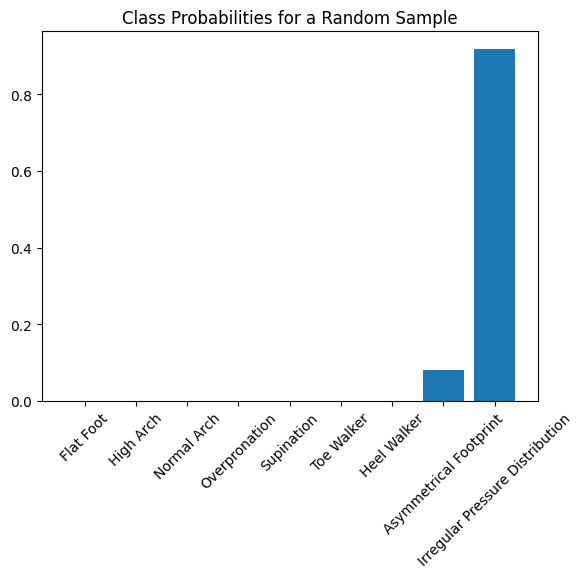

In [33]:
import os
import pickle
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Define footprint pattern class names
class_names = [
    "Flat Foot", "High Arch", "Normal Arch", "Overpronation", "Supination",
    "Toe Walker", "Heel Walker", "Asymmetrical Footprint", "Irregular Pressure Distribution"
]

# Load dataset
DATASET_PATH = "C:\\Users\\shant\\.cache\\kagglehub\\datasets\\mahdiislam\\pressure-sensor-heatmaprgb\\versions\\1\\"
X_path = os.path.join(DATASET_PATH, "X_9_RGB.pickle")
y_path = os.path.join(DATASET_PATH, "y_9_RGB.pickle")

with open(X_path, 'rb') as f:
    X_data = pickle.load(f)

with open(y_path, 'rb') as f:
    y_data = pickle.load(f)

# Resize images to match the model input size (128, 128)
X_data = np.array([tf.image.resize(img, (128, 128)).numpy() for img in X_data])

# Normalize image data
X_data = X_data.astype('float32') / 255.0

# Convert labels to categorical
num_classes = len(class_names)
y_data = tf.keras.utils.to_categorical(y_data, num_classes)

# Compute class weights to handle class imbalance
y_data_int = np.argmax(y_data, axis=1)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_data_int),
    y=y_data_int
)
class_weights_dict = {i: class_weights[i] for i in range(num_classes)}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Added dropout for regularization
    layers.Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model with Class Weights
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict
)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('footprint_model.h5')

# Visualize Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Visualize Prediction Probabilities for a Random Sample
sample_idx = random.randint(0, len(X_test) - 1)
pred_probs = model.predict(np.expand_dims(X_test[sample_idx], axis=0))

plt.bar(class_names, pred_probs[0])
plt.xticks(rotation=45)
plt.title("Class Probabilities for a Random Sample")
plt.show()


correct 4


In [34]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt


In [35]:
class_names = [
    "Flat Foot", "High Arch", "Normal Arch", "Overpronation", "Supination",
    "Toe Walker", "Heel Walker", "Asymmetrical Footprint", "Irregular Pressure Distribution"
]
num_classes = len(class_names)


In [36]:
# Load dataset
DATASET_PATH = "C:\\Users\\shant\\.cache\\kagglehub\\datasets\\mahdiislam\\pressure-sensor-heatmaprgb\\versions\\1\\"
X_path = os.path.join(DATASET_PATH, "X_9_RGB.pickle")
y_path = os.path.join(DATASET_PATH, "y_9_RGB.pickle")

with open(X_path, 'rb') as f:
    X_data = pickle.load(f)

with open(y_path, 'rb') as f:
    y_data = pickle.load(f)

# Resize images to match the model input size (224, 224)
X_data = np.array([tf.image.resize(img, (224, 224)).numpy() for img in X_data])

# Normalize image data
X_data = X_data.astype('float32') / 255.0

# Convert labels to integer
y_data = np.array(y_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [37]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights[i] for i in range(num_classes)}


In [38]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [39]:
# Load the base model (e.g., EfficientNetB0) with pre-trained ImageNet weights
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict
)

# Unfreeze some layers in the base model for fine-tuning
base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training
fine_tune_history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 18s 1us/step


c:\DRIVE\Projects\4.3.25\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.1252 - loss: 2.2928 - val_accuracy: 0.0970 - val_loss: 2.2104
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.1172 - loss: 2.2057 - val_accuracy: 0.1274 - val_loss: 2.1973
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 919ms/step - accuracy: 0.1183 - loss: 2.1948 - val_accuracy: 0.1080 - val_loss: 2.1971
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 894ms/step - accuracy: 0.1173 - loss: 2.1975 - val_accuracy: 0.1080 - val_loss: 2.1969
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 920ms/step - accuracy: 0.1029 - loss: 2.1941 - val_accuracy: 0.1080 - val_loss: 2.1971
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 945ms/step - accuracy: 0.1169 - loss: 2.1978 - val_accuracy: 0.1080 - val_loss: 2.1970
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 889ms/step - accuracy: 0.0980 - loss: 2.1999 - val_accuracy: 0.1191 - val_loss: 2.1970
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 889ms/step - accuracy: 0.0926 - loss: 2.1976 - val_accuracy: 

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


12/12 - 7s - 613ms/step - accuracy: 0.1080 - loss: 2.2227
Test Accuracy: 10.80%


In [41]:
model.save('fine_tuned_footprint_model.h5')


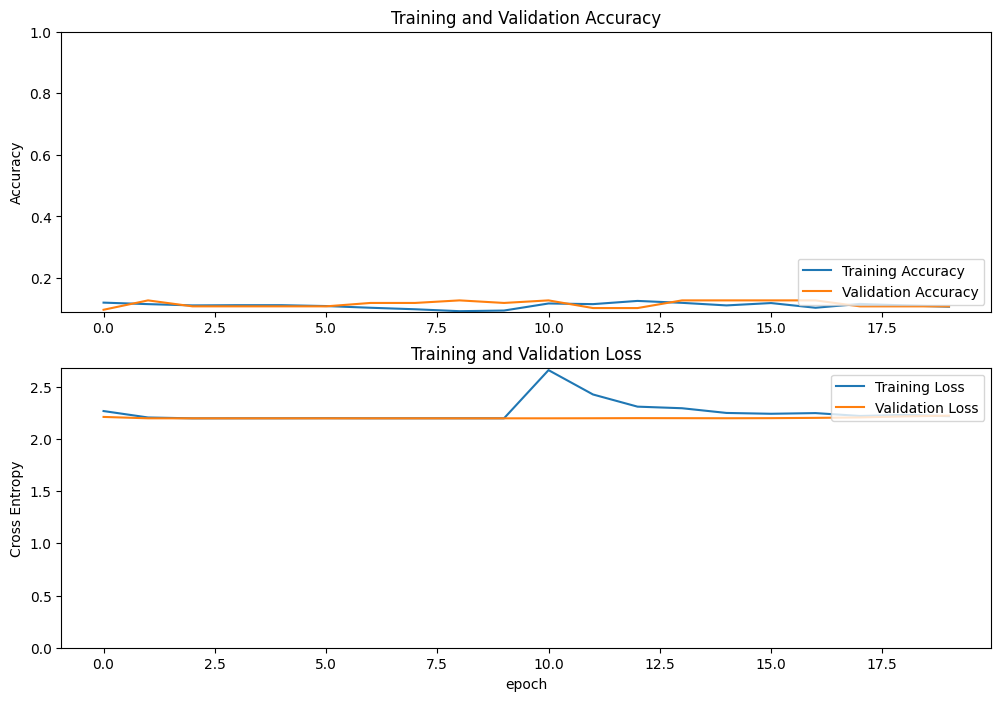

In [42]:
# Plot training and validation accuracy
acc = history.history['accuracy'] + fine_tune_history.history['accuracy']
val_acc = history.history['val_accuracy'] + fine_tune_history.history['val_accuracy']
loss = history.history['loss'] + fine_tune_history.history['loss']
val_loss = history.history['val_loss'] + fine_tune_history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


correct 5


Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 50s 899ms/step - accuracy: 0.1088 - loss: 2.2726 - val_accuracy: 0.0914 - val_loss: 2.2121
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 821ms/step - accuracy: 0.1010 - loss: 2.2124 - val_accuracy: 0.1025 - val_loss: 2.1983
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 809ms/step - accuracy: 0.1056 - loss: 2.2009 - val_accuracy: 0.1025 - val_loss: 2.2007
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 810ms/step - accuracy: 0.1011 - loss: 2.1988 - val_accuracy: 0.0970 - val_loss: 2.1976
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 812ms/step - accuracy: 0.0919 - loss: 2.1989 - val_accuracy: 0.0914 - val_loss: 2.1977
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 829ms/step - accuracy: 0.1202 - loss: 2.1971 - val_accuracy: 0.0914 - val_loss: 2.1980
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 846ms/step - accuracy: 0.1153 - loss: 2.1971 - val_accuracy: 0.0970 - val_loss: 2.1982
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 816ms/step - accuracy: 0.1195 - loss: 2.1974 - val_accu

Test Accuracy: 10.25%
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


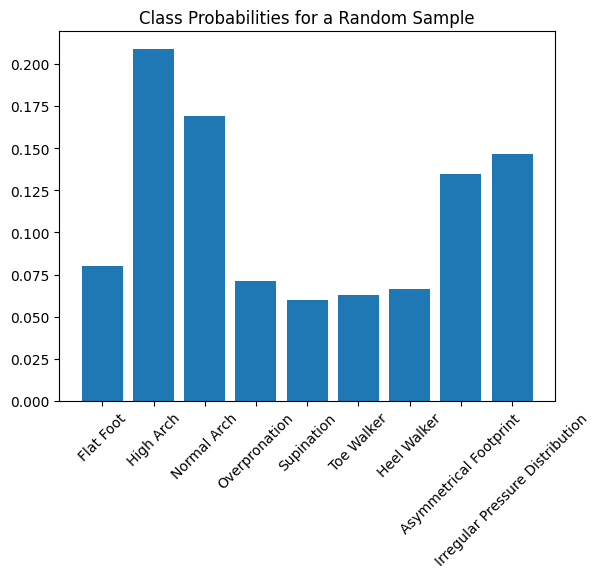

In [43]:
import os
import pickle
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Define footprint pattern class names
class_names = [
    "Flat Foot", "High Arch", "Normal Arch", "Overpronation", "Supination",
    "Toe Walker", "Heel Walker", "Asymmetrical Footprint", "Irregular Pressure Distribution"
]

# Load dataset
DATASET_PATH = "C:\\Users\\shant\\.cache\\kagglehub\\datasets\\mahdiislam\\pressure-sensor-heatmaprgb\\versions\\1\\"
X_path = os.path.join(DATASET_PATH, "X_9_RGB.pickle")
y_path = os.path.join(DATASET_PATH, "y_9_RGB.pickle")

with open(X_path, 'rb') as f:
    X_data = pickle.load(f)

with open(y_path, 'rb') as f:
    y_data = pickle.load(f)

# Resize images to match the model input size (224,224)
X_data = np.array([tf.image.resize(img, (224, 224)).numpy() for img in X_data])

# Normalize image data
X_data = X_data.astype('float32') / 255.0

# Convert labels to categorical
num_classes = len(class_names)
y_data = tf.keras.utils.to_categorical(y_data, num_classes)

# Convert labels to integer for class weighting
y_data_int = np.argmax(y_data, axis=1)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_data_int),
    y=y_data_int
)
class_weights_dict = {i: class_weights[i] for i in range(num_classes)}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Load EfficientNetB0 model pre-trained on ImageNet, excluding top layers
base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=15, batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict
)

# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2  # Unfreeze the last half of the layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model after unfreezing
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model with fine-tuning
fine_tune_history = model.fit(
    X_train, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('footprint_model.h5')

# Visualize prediction probabilities for a random sample
sample_idx = random.randint(0, len(X_test) - 1)
pred_probs = model.predict(np.expand_dims(X_test[sample_idx], axis=0))

plt.bar(class_names, pred_probs[0])
plt.xticks(rotation=45)
plt.title("Class Probabilities for a Random Sample")
plt.show()
